In [1]:
import nest
import matplotlib.pyplot as pl

nest.ResetKernel()
nest.SetKernelStatus(dict(resolution=.1))

In [2]:
# define soma and dendrite compartment parameters
soma_params = {
    'C_m': 1.0,
    'g_c': 0.1,
    'g_L': 0.1,
    'E_L': -70.0,
}

dend_params = {
    'C_m': 0.1,
    'g_c': 0.1,
    'g_L': 0.01,
    'E_L': -70.0,
}

In [3]:
# create neuron model
n_ = nest.Create('iaf_neat')

In [4]:
# add compartments
nest.AddCompartment(n_, 0, -1, soma_params)
nest.AddCompartment(n_, 1, 0, dend_params)
nest.AddCompartment(n_, 2, 0, dend_params)

In [5]:
# set the spike threshold
nest.SetStatus(n_, {'V_th': -50.})

In [6]:
# add receptors
ridx_gaba = nest.AddReceptor(n_, 0, "GABA")
ridx_ampa = nest.AddReceptor(n_, 1, "AMPA")
ridx_nmda = nest.AddReceptor(n_, 2, "AMPA+NMDA")

In [7]:
# create spike generators
sg_ampa = nest.Create('spike_generator', 1, {'spike_times': [1., 5., 6.,10., 50.]})
sg_gaba = nest.Create('spike_generator', 1, {'spike_times': [150., 155., 160., 162., 170.]})
sg_nmda = nest.Create('spike_generator', 1, {'spike_times': [15.,55., 60., 62., 70., 154., 160., 172., 178.]})

In [8]:
# specify synapses
ss_ampa = {'synapse_model': 'static_synapse', 'weight': .2, 'delay': 0.5, 'receptor_type': ridx_ampa}
ss_gaba = {'synapse_model': 'static_synapse', 'weight': .2, 'delay': 0.5, 'receptor_type': ridx_gaba}
ss_nmda = {'synapse_model': 'static_synapse', 'weight': .2, 'delay': 0.5, 'receptor_type': ridx_nmda}

In [9]:
# connect spike generators to receptors
nest.Connect(sg_ampa, n_, syn_spec=ss_ampa)
nest.Connect(sg_gaba, n_, syn_spec=ss_gaba)
nest.Connect(sg_nmda, n_, syn_spec=ss_nmda)

In [10]:
# create and connect multimeter
m_neat = nest.Create('multimeter', 1, {'record_from': ['V_m_0', 'V_m_1', 'V_m_2'], 'interval': .1})
nest.Connect(m_neat, n_)

In [11]:
# simulate
nest.Simulate(300.)
events_neat = nest.GetStatus(m_neat, 'events')[0]

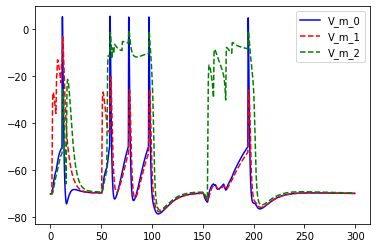

In [12]:
# plot
pl.plot(events_neat['times'], events_neat['V_m_0'], c='b', label='V_m_0')
pl.plot(events_neat['times'], events_neat['V_m_1'], c='r', ls='--', label='V_m_1')
pl.plot(events_neat['times'], events_neat['V_m_2'], c='g', ls='--', label='V_m_2')
pl.legend()